In [ ]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

DB_PATH = "../../datasets/CCSMLDatabase.db"
TABLE = "master_clean"

conn = sqlite3.connect(DB_PATH)
df = pd.read_sql_query(
    f"SELECT * FROM master_clean",
    conn,
)
conn.close()

# Global style settings
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"], # Standard crisp fonts
    "axes.linewidth": 1.5,               # Thicker axis lines
    "axes.spines.top": False,            # Remove top spine
    "axes.spines.right": False,          # Remove right spine
    "xtick.major.width": 1.5,            # Match tick thickness to axis
    "ytick.major.width": 1.5,
    "xtick.direction": "out",            # Ticks point outside
    "ytick.direction": "out",
    "font.size": 10,
    "axes.labelsize": 11,
    "axes.labelweight": "normal",
})

n = df.shape[0]
df.columns

Index(['id', 'tag', 'name', 'pubchemId', 'adduct', 'mass', 'z', 'ccs', 'smi',
       'inchikey', 'superclass', 'class', 'subclass'],
      dtype='object')

# General Statistics of the dataset

In [5]:
df.describe()

,id,mass,z,ccs
count,62043.000000,62043.000000,62043.000000,62043.000000
mean,37267.259836,396.784141,0.426575,194.337055
std,19033.203068,126.471068,0.906195,30.076823
min,1.000000,94.065100,-2.000000,108.800000
25%,22455.500000,329.186000,-1.000000,178.400000
50%,37985.000000,383.183700,1.000000,192.560000
75%,53516.500000,442.214800,1.000000,206.110000
max,69858.000000,2848.785370,4.000000,756.790000


# Number of adducts, superclasses, subclasses

/var/folders/qw/xxtxsrpx2vs33wbzwym6vf680000gn/T/ipykernel_13423/78663971.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(main_perc.index, rotation=45, ha="right", fontsize=8)


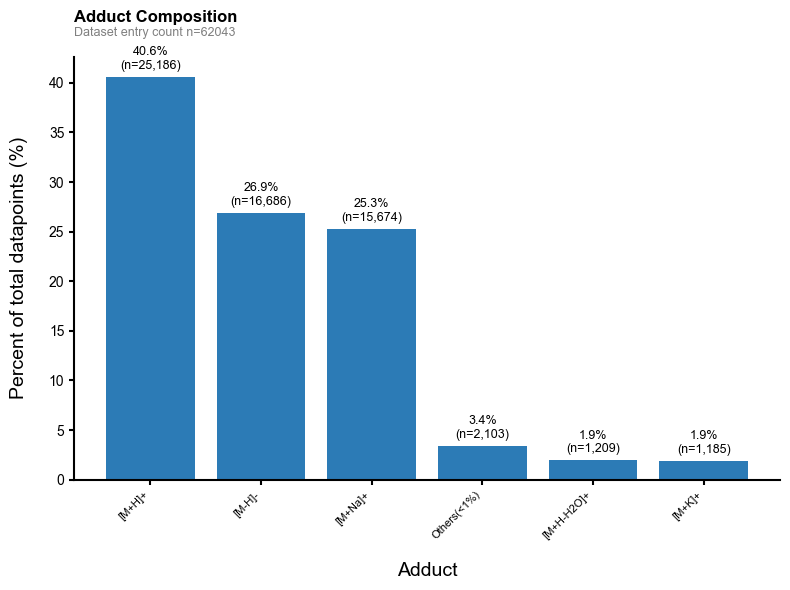

In [17]:
counts = df["adduct"].value_counts()
perc = (counts / counts.sum()) * 100
mask = perc >= 1

main_perc = perc[mask]
main_counts = counts[mask]
other_sum = perc[~mask].sum()
other_count = counts[~mask].sum()

if other_sum > 0:
    main_perc = pd.concat([main_perc, pd.Series({'Others(<1%)': other_sum})])
    main_counts = pd.concat([main_counts, pd.Series({'Others(<1%)': other_count})])

main_perc = main_perc.sort_values(ascending=False)
main_counts = main_counts[main_perc.index]

fig, ax = plt.subplots(figsize=(max(8, 0.4 * len(main_perc)), 6))
bars = ax.bar(main_perc.index, main_perc.values, color='#2c7bb6')

# Added labelpad to move axis labels away from the ticks
ax.set_ylabel("Percent of total datapoints (%)", labelpad=15)
ax.set_xlabel("Adduct", labelpad=15)

# Increased pad for the title
ax.set_title('Adduct Composition', fontweight='bold', loc='left', pad=25)

# Adjusted the y-coordinate of the 'n' count to sit higher
ax.text(0, 1.05, f'Dataset entry count n={n}', transform=ax.transAxes, fontsize=9, color='gray')

for bar, pct, count in zip(bars, main_perc.values, main_counts.values):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y + 0.5, f'{pct:.1f}%\n(n={count:,})', ha='center', va='bottom', fontsize=9)

ax.set_xticklabels(main_perc.index, rotation=45, ha="right", fontsize=8)

# tight_layout handles basic padding, but you can also use subplots_adjust for manual control
plt.tight_layout()
plt.show()

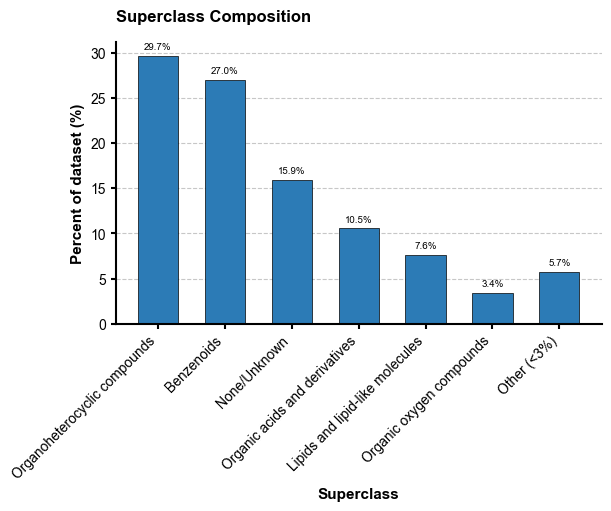

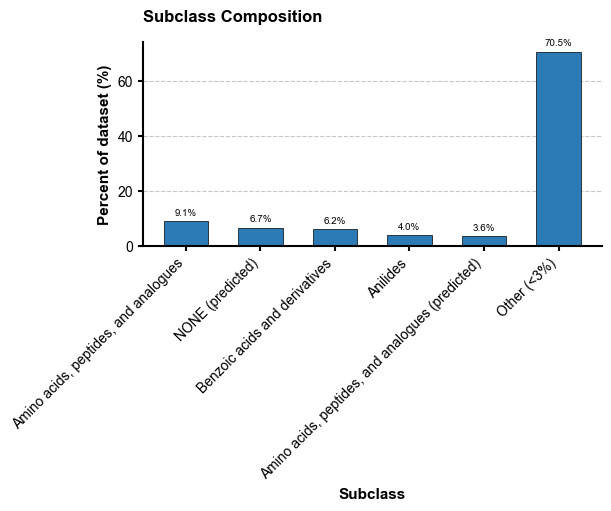

In [3]:
fields = [('superclass', 'Superclass'), ('subclass', 'Subclass')]

for col, display_name in fields:
    counts = df[col].value_counts(dropna=False)
    perc = (counts / len(df)) * 100

    # Group anything with less than 3% into 'Other'
    mask = perc < 3
    main_perc = perc[~mask] 
    other_sum = perc[mask].sum()
    
    # Handle Labels: Ensure NaN is a string and readable
    labels = [str(lbl) if pd.notna(lbl) else 'None/Unknown' for lbl in main_perc.index]
    values = main_perc.values.tolist()
    
    if other_sum > 0:
        values.append(other_sum)
        labels.append('Other (<3%)')

    fig, ax = plt.subplots(figsize=(max(6, 0.5 * len(labels)), 5), constrained_layout=True)

    bars = ax.bar(labels, values, color='#2c7bb6', width=0.6, edgecolor='black', linewidth=0.5)
    ax.bar_label(bars, fmt='%.1f%%', padding=3, fontsize=7)       
    ax.set_ylabel('Percent of dataset (%)', fontweight='bold')
    ax.set_xlabel(display_name, fontweight='bold')
    ax.set_title(f'{display_name} Composition', loc='left', fontsize=12, fontweight='bold', pad=15)
    
    ax.set_xticks(range(len(labels))) # Explicitly set tick positions
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.yaxis.grid(True, linestyle='--', alpha=0.7, zorder=0)
    ax.set_axisbelow(True) # Ensure grid is behind bars

    plt.show()